# Imports

In [1]:
import numpy  as np
import pandas as pd

from dstoolkit.modeling import automl_lgbm_classifier_cv, automl_lgbm_classifier

from sklearn.model_selection import train_test_split

/home/junior/.venv/dstoolkit/lib64/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Functions

In [2]:
random_state = 42
np.random.seed(random_state)

pd.options.display.max_columns = None
pd.options.display.max_rows = 2000

# Loading Datasets

In [3]:
df = pd.read_csv('../data/raw/cardio.csv', sep=';').drop(['id'], axis=1)
new_columns = {"ap_hi": "systolic_blood_pressure", "ap_lo": "diastolic_blood_pressure", "gluc": "glucose", "smoke": "smoking", "alco": "alcohol", "active": "physical_activity", "cardio": "disease"}

df.rename(columns=new_columns, inplace=True)

target = 'disease'

X = df.drop([target], axis=1)
y = df.loc[:, [target]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


# Machine Learning

## LightGBM CV

--------> Standard Model
---------------> Modeling
---------------> Metrics
Cross Validation  ROC AUC: 0.8014, KS: -
Test  Validation  ROC AUC: 0.8072, KS: 0.492

--------> Feature Selection 
---------------> Select From Model
---------------> Modeling
---------------> Metrics
Cross Validation  ROC AUC: 0.7875, KS: -
Test  Validation  ROC AUC: 0.7935, KS: 0.4657

--------> Hyperparameter Tuning
---------------> Modeling
---------------> Metrics
Cross Validation  ROC AUC: 0.7885, KS: -
Test  Validation  ROC AUC: 0.7948, KS: 0.4691

--------> Feature Importance


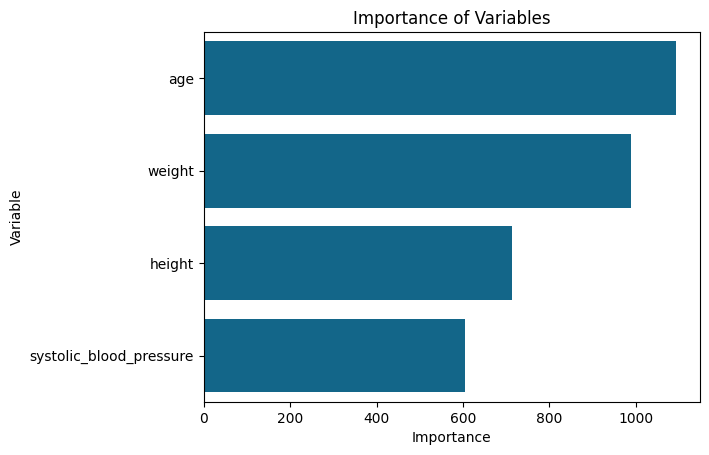


--------> Permutation Importance


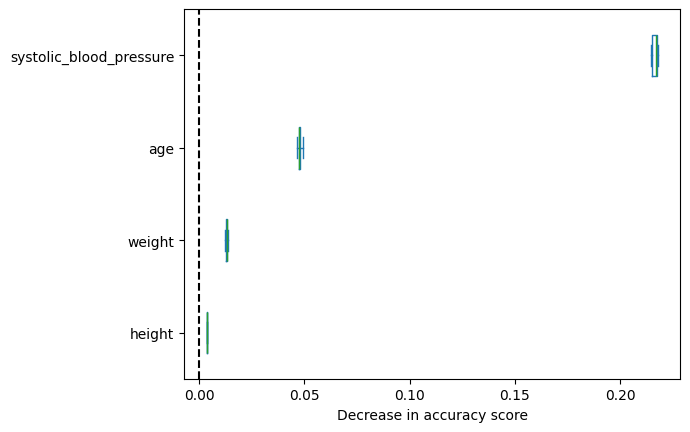


--------> Shap Values


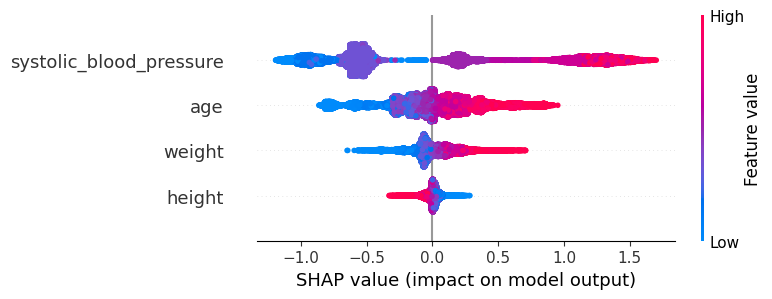

CPU times: user 6min 21s, sys: 5.52 s, total: 6min 26s
Wall time: 31.7 s


In [4]:
%%time
dict_results = automl_lgbm_classifier_cv(
    X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, selection_method='sfm', target='disease', cv=3, n_trials=10, scoring='roc_auc', direction='maximize')

In [5]:
dict_results['model']

LGBMClassifier(bagging_fraction=0.7957912319345267, bagging_freq=3,
               feature_fraction=0.6265565871872204,
               lambda_l1=1.6054539751118494e-07, lambda_l2=6.848749776733017,
               learning_rate=0.027977984330636384, metric='binary_logloss',
               min_child_samples=41, n_jobs=-1, num_leaves=35,
               objective='binary', random_state=42, verbosity=-1)

## Simples

In [6]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.4, random_state=42)

--------> Standard Model
---------------> Modeling
---------------> Metrics
Training    ROC AUC: 0.83, KS: 0.5
Validation  ROC AUC: 0.8, KS: 0.48
Testing     ROC AUC: 0.81, KS: 0.5

--------> Feature Selection 
---------------> Select From Model
---------------> Modeling
---------------> Metrics
Training    ROC AUC: 0.81, KS: 0.47
Validation  ROC AUC: 0.79, KS: 0.44
Testing     ROC AUC: 0.8, KS: 0.47

--------> Hyperparameter Tuning
---------------> Modeling
---------------> Metrics
Training    ROC AUC: 0.82, KS: 0.48
Validation  ROC AUC: 0.78, KS: 0.44
Testing     ROC AUC: 0.79, KS: 0.47

--------> Feature Importance


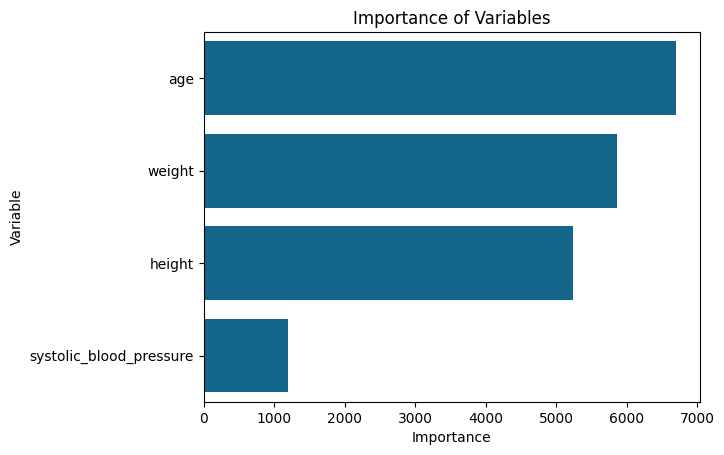


--------> Permutation Importance


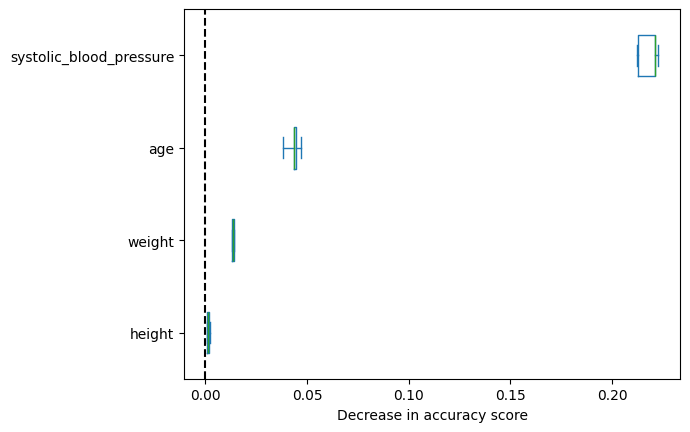


--------> Shap Values


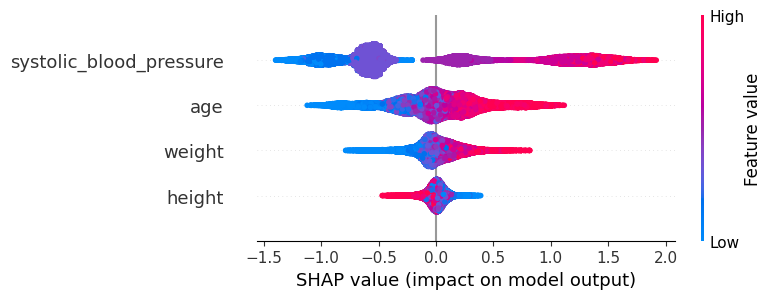

In [7]:
dict_results = automl_lgbm_classifier(
    X_train, y_train, X_valid, y_valid, X_test, y_test, selection_method='sfm', target='disease', n_trials=10, direction='maximize')